In [1]:
import os

print(os.getcwd())

/home/pusheen/Desktop/remote/Training


In [16]:
train_path = os.path.join(os.getcwd(), 'train')
train_fol = os.listdir(train_path)
print(train_fol)

['MOT17-04', 'MOT17-02', 'MOT17-10', 'MOT17-11', 'MOT17-09', 'MOT17-05', 'MOT17-13']


In [2]:
train_path = os.path.join(os.getcwd(), 'MOT20/train')
train_fol = os.listdir(train_path)
print(train_fol)

['MOT20-03', 'MOT20-01', 'MOT20-05', 'MOT20-02']


In [3]:
import cv2
import numpy as np

for lis in train_fol:
    int_lines = []
    lis_path = os.path.join(train_path, lis)
    gt_txt = os.path.join(lis_path, 'gt/gt.txt')
    img_path = os.path.join(lis_path, 'img1/000001.jpg')
    
    img = cv2.imread(img_path)
    img_height, img_width, channels = img.shape
    # print(img_height, img_width)
    
    with open(gt_txt) as f:
        lines = f.readlines()
        
    str_line = [line.rstrip() for line in lines]
    
    for line in str_line:
        int_line = line.split(',')
        int_lines.append([float(ele) for ele in int_line])
        
    int_lines.sort(key=lambda x:x[0])
    
    if not os.path.isdir(os.path.join(lis_path, 'gt/frame_gt')):
        os.mkdir(os.path.join(lis_path, 'gt/frame_gt'))
    if not os.path.isdir(os.path.join(lis_path, 'gt/frame_small_gt')):
        os.mkdir(os.path.join(lis_path, 'gt/frame_small_gt'))
    if not os.path.isdir(os.path.join(lis_path, 'gt/frame_medium_gt')):
        os.mkdir(os.path.join(lis_path, 'gt/frame_medium_gt'))
    if not os.path.isdir(os.path.join(lis_path, 'gt/frame_large_gt')):
        os.mkdir(os.path.join(lis_path, 'gt/frame_large_gt'))
        
    txt_file_path = os.path.join(lis_path, 'gt/frame_gt')
    txt_file_small_path = os.path.join(lis_path, 'gt/frame_small_gt')
    txt_file_medium_path = os.path.join(lis_path, 'gt/frame_medium_gt')
    txt_file_large_path = os.path.join(lis_path, 'gt/frame_large_gt')
    
    file_num_start = 1
    file_num_end = int(int_lines[-1][0])
    int_lines_index = 0
    
    for i in range(file_num_start, file_num_end+1):
        txt_file_name = str(format(i, '06')) + '.txt'
        with open(os.path.join(txt_file_path, txt_file_name), 'w') as f:
            while int_lines_index < len(int_lines):
                if i == int_lines[int_lines_index][0]:
                    if int_lines[int_lines_index][7] == 1 or int_lines[int_lines_index][7] == 2:
                        cls = '0'
                        left = float(int_lines[int_lines_index][2]) if float(int_lines[int_lines_index][2]) > 0 else 0
                        top = float(int_lines[int_lines_index][3]) if float(int_lines[int_lines_index][3]) > 0 else 0
                        right = float(int_lines[int_lines_index][2]) + float(int_lines[int_lines_index][4])
                        if right > img_width:
                            right = img_width
                        bottom = float(int_lines[int_lines_index][3]) + float(int_lines[int_lines_index][5])
                        if bottom > img_height:
                            bottom = img_height
                        width = right - left
                        c_left = left + (width/2)
                        width /= img_width
                        height = bottom - top
                        c_top = top + (height/2)
                        height /= img_height
                        c_left /= img_width
                        c_top /= img_height
                        data = cls + ' ' + str(c_left) + ' ' + str(c_top) + ' ' + str(width) + ' ' + str(height) + '\n'
                        f.write(data)
                int_lines_index += 1
            int_lines_index = 0
                
        f.close()
            
            
    int_lines_index = 0
    small_number = 0
    for i in range(file_num_start, file_num_end+1):
        txt_file_name = str(format(i, '06')) + '.txt'
        with open(os.path.join(txt_file_small_path, txt_file_name), 'w') as f:
            while int_lines_index < len(int_lines):
                if i == int_lines[int_lines_index][0]:
                    if int_lines[int_lines_index][7] == 1 or int_lines[int_lines_index][7] == 2:
                        cls = '0'
                        left = float(int_lines[int_lines_index][2]) if float(int_lines[int_lines_index][2]) > 0 else 0
                        top = float(int_lines[int_lines_index][3]) if float(int_lines[int_lines_index][3]) > 0 else 0
                        right = float(int_lines[int_lines_index][2]) + float(int_lines[int_lines_index][4])
                        if right > img_width:
                            right = img_width
                        bottom = float(int_lines[int_lines_index][3]) + float(int_lines[int_lines_index][5])
                        if bottom > img_height:
                            bottom = img_height
                        ori_width = right - left
                        c_left = left + (ori_width/2)
                        width = ori_width / img_width
                        ori_height = bottom - top
                        c_top = top + (ori_height/2)
                        height = ori_height / img_height
                        c_left /= img_width
                        c_top /= img_height
                        if float(ori_width) * float(ori_height) < 32 ** 2:
                            data = cls + ' ' + str(c_left) + ' ' + str(c_top) + ' ' + str(width) + ' ' + str(height) + '\n'
                            f.write(data)
                            small_number += 1
                int_lines_index += 1
            int_lines_index = 0
               
        f.close()
            
    int_lines_index = 0
    medium_number = 0
    for i in range(file_num_start, file_num_end+1):
        txt_file_name = str(format(i, '06')) + '.txt'
        with open(os.path.join(txt_file_medium_path, txt_file_name), 'w') as f:
            while int_lines_index < len(int_lines):
                if i == int_lines[int_lines_index][0]:
                    if int_lines[int_lines_index][7] == 1 or int_lines[int_lines_index][7] == 2:
                        cls = '0'
                        left = float(int_lines[int_lines_index][2]) if float(int_lines[int_lines_index][2]) > 0 else 0
                        top = float(int_lines[int_lines_index][3]) if float(int_lines[int_lines_index][3]) > 0 else 0
                        right = float(int_lines[int_lines_index][2]) + float(int_lines[int_lines_index][4])
                        if right > img_width:
                            right = img_width
                        bottom = float(int_lines[int_lines_index][3]) + float(int_lines[int_lines_index][5])
                        if bottom > img_height:
                            bottom = img_height
                        ori_width = right - left
                        c_left = left + (ori_width/2)
                        width = ori_width / img_width
                        ori_height = bottom - top
                        c_top = top + (ori_height/2)
                        height = ori_height / img_height
                        c_left /= img_width
                        c_top /= img_height
                        if float(ori_width) * float(ori_height) > 32 ** 2 and float(ori_width) * float(ori_height) < 96 ** 2:
                            data = cls + ' ' + str(c_left) + ' ' + str(c_top) + ' ' + str(width) + ' ' + str(height) + '\n'
                            f.write(data)
                            medium_number += 1
                int_lines_index += 1
            int_lines_index = 0
                    
                
        f.close()
            
    int_lines_index = 0
    large_number = 0
    for i in range(file_num_start, file_num_end+1):
        txt_file_name = str(format(i, '06')) + '.txt'
        with open(os.path.join(txt_file_large_path, txt_file_name), 'w') as f:
            while int_lines_index < len(int_lines):
                if i == int_lines[int_lines_index][0]:
                    if int_lines[int_lines_index][7] == 1 or int_lines[int_lines_index][7] == 2:
                        cls = '0'
                        left = float(int_lines[int_lines_index][2]) if float(int_lines[int_lines_index][2]) > 0 else 0
                        top = float(int_lines[int_lines_index][3]) if float(int_lines[int_lines_index][3]) > 0 else 0
                        right = float(int_lines[int_lines_index][2]) + float(int_lines[int_lines_index][4])
                        if right > img_width:
                            right = img_width
                        bottom = float(int_lines[int_lines_index][3]) + float(int_lines[int_lines_index][5])
                        if bottom > img_height:
                            bottom = img_height
                        ori_width = right - left
                        c_left = left + (ori_width/2)
                        width = ori_width / img_width
                        ori_height = bottom - top
                        c_top = top + (ori_height/2)
                        height = ori_height / img_height
                        c_left /= img_width
                        c_top /= img_height
                        if float(ori_width) * float(ori_height) > 96 ** 2:
                            data = cls + ' ' + str(c_left) + ' ' + str(c_top) + ' ' + str(width) + ' ' + str(height) + '\n'
                            f.write(data)
                            large_number += 1
                int_lines_index += 1
            int_lines_index = 0
                
        f.close()
        
    print(small_number, medium_number, large_number)


10037 301403 2168
0 7178 12691
989 312117 333024
0 50407 104322


In [3]:
images = []

for lis in train_fol:
    lis_path = os.path.join(train_path, lis)
    img_path = os.path.join(lis_path, 'img1')
    img_list = os.listdir(img_path)
    
    for img in img_list:
        images.append(os.path.join(img_path, img))
        

import random
'''
random.shuffle(images)
train_index = int(len(images) * 0.50)
valid_index = int(len(images) * 0.80)
train_data = images[:train_index]
valid_data = images[train_index: valid_index]
test_data = images[valid_index:]

with open('train2017.txt', 'w') as f:
    for path in train_data:
        f.write(path)
        f.write('\n')
    f.close()
    
with open('val2017.txt', 'w') as f:
    for path in valid_data:
        f.write(path)
        f.write('\n')
    f.close()
    
with open('test2017.txt', 'w') as f:
    for path in test_data:
        f.write(path)
        f.write('\n')
    f.close()
'''    

with open('test2020.txt', 'w') as f:
    for path in images:
        f.write(path)
        f.write('\n')
    f.close()

316.40000000000003 467.91111111111115 344.8666666666667 584.8888888888889
260.8666666666667 479.52592592592595 280.4666666666667 587.3777777777777
269.73333333333335 476.20740740740735 303.8 603.9703703703703
178.73333333333335 424.7703703703704 193.66666666666669 484.50370370370376
292.59999999999997 470.40000000000003 310.79999999999995 594.0148148148148
521.2666666666667 507.73333333333335 558.6 684.4444444444445
185.73333333333335 472.8888888888889 210.0 576.5925925925926
219.79999999999998 462.1037037037037 240.33333333333331 571.6148148148147
439.59999999999997 557.5111111111112 488.1333333333333 778.1925925925926
495.1333333333333 531.7925925925927 534.8 709.3333333333334
461.53333333333336 512.7111111111111 499.8 686.1037037037037
205.79999999999998 461.27407407407406 228.66666666666666 558.3407407407408


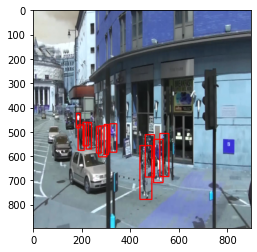

In [14]:
img_path = '/home/pusheen/Desktop/sensors_1/Training/train/MOT17-13/img1/000448.jpg'
label_path = '/home/pusheen/Desktop/sensors_1/Training/train/MOT17-13/img1/000448.txt'

from matplotlib import pyplot as plt
import cv2

lines = []
img = cv2.imread(img_path)
#height, width, channel = img.shape
height = 896
width = 896

cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img, (896, 896))

with open(label_path, 'r') as f:
    lines = f.readlines()
    f.close()
    
for line in lines:
    line_list = line.split(' ')
    left = float(line_list[1]) * width
    top = float(line_list[2]) * height
    right = float(line_list[3]) * width + left
    if right > width:
        right = width
    bottom = float(line_list[4]) * height + top
    if bottom > height:
        bottom = height
        
    print(left, top, right, bottom)
        
    img2 = cv2.rectangle(img2, (int(left), int(top)), (int(right), int(bottom)), (255, 0, 0), 3)

plt.imshow(img2)
plt.show()
    

In [19]:
images = []

img_path = '/home/pusheen/Desktop/sensors_1/Training/MOT20/train/MOT20-03/img1'     
file_list = os.listdir(img_path)
images = [file for file in file_list if file.endswith('.jpg')]
txt_path = '/home/pusheen/Desktop/sensors_1/Training/MOT20/train/MOT20-03/gt/frame_small_gt'     


import random

random.shuffle(images)
train_index = int(len(images) * 0.50)
valid_index = int(len(images) * 0.80)
train_data = images[:train_index]
valid_data = images[train_index: valid_index]
test_data = images[valid_index:]

with open('train2017.txt', 'w') as f:
    for path in train_data:
        f.write(os.path.join(txt_path, path))
        f.write('\n')
    f.close()
    
with open('val2017.txt', 'w') as f:
    for path in valid_data:
        f.write(os.path.join(txt_path, path))
        f.write('\n')
    f.close()
    
with open('test2017.txt', 'w') as f:
    for path in test_data:
        f.write(os.path.join(txt_path, path))
        f.write('\n')
    f.close()
    